In [1]:
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
sys.path.append('./../../RoboPoint/')

from robopoint_utils import load_model, do_inference, get_coordinates, generate_prompt
from utils import extract_all, visualize_points_on_image, plot_euclidean_bplot

2025-01-26 15:23:59.999349: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 15:24:00.397732: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 15:24:00.397773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 15:24:00.397801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 15:24:00.417232: I tensorflow/core/platform/cpu_feature_g

In [2]:
model_name = "wentao-yuan/robopoint-v1-vicuna-v1.5-13b"
model, processor, tokenizer = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint at wentao-yuan/robopoint-v1-vicuna-v1.5-13b were not used when initializing LlavaLlamaForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.class_embedding', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder

../data/base_experiments/kit_kitchen_8_oven_tray/groundtruth.txt
../data/base_experiments/kit_kitchen_4_fruit/groundtruth.txt
../data/base_experiments/bridge_5_fridge/groundtruth.txt
../data/base_experiments/bridge_7_drawer/groundtruth.txt
../data/base_experiments/bridge_2_can/groundtruth.txt
../data/base_experiments/bridge_1_pot_and_fork/groundtruth.txt
../data/base_experiments/kit_kitchen_6_pot_cam1/groundtruth.txt
../data/base_experiments/bridge_3_potato/groundtruth.txt
../data/base_experiments/bridge_8_cucumber/groundtruth.txt
../data/base_experiments/kit_kitchen_1_banana/groundtruth.txt
../data/base_experiments/kit_kitchen_3_toast/groundtruth.txt
../data/base_experiments/kit_kitchen_2_microwave/groundtruth.txt
../data/base_experiments/kit_kitchen_5_toaster_lever/groundtruth.txt
../data/base_experiments/bridge_4_glass_cup/groundtruth.txt
../data/base_experiments/bridge_6_broccoli/groundtruth.txt
../data/base_experiments/kit_kitchen_7_pot_cam2/groundtruth.txt
Task: 1
pull the oven t

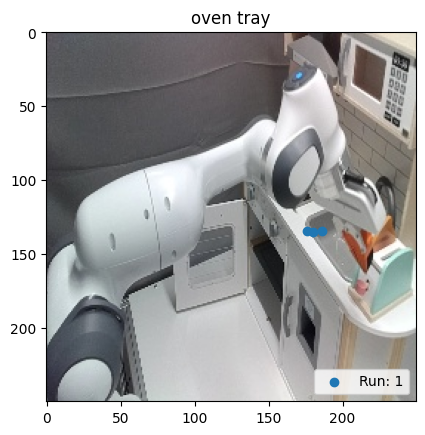

Task: 2
move the fruit from the right stove to the sink

Run: 1 - Output: [(0.642, 0.863), (0.658, 0.844), (0.633, 0.844), (0.627, 0.865)]


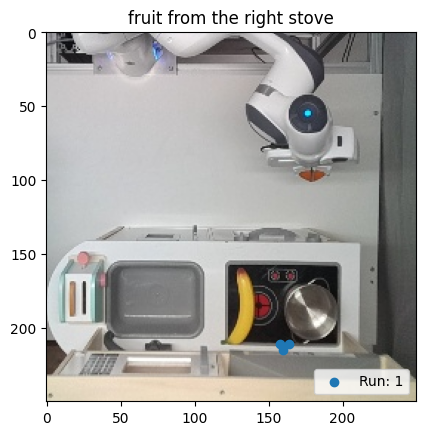

Run: 1 - Output: [(0.581, 0.871), (0.597, 0.869), (0.613, 0.867)]


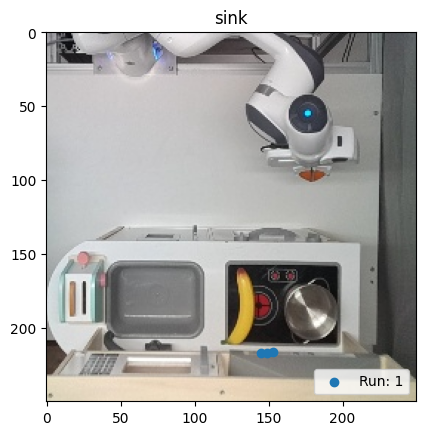

Task: 3
open low fridge
Run: 1 - Output: [(0.498, 0.196), (0.469, 0.196), (0.453, 0.198), (0.483, 0.206), (0.438, 0.196)]


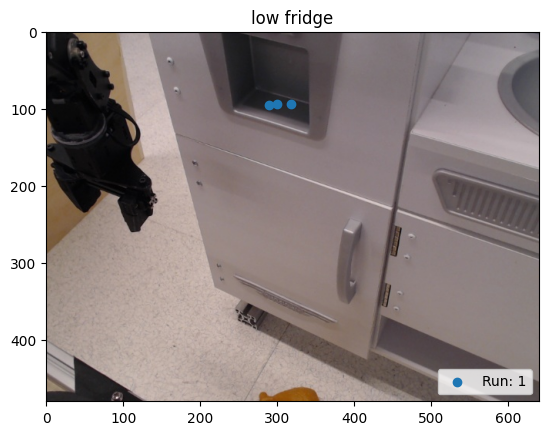

Task: 4
open the drawer

Run: 1 - Output: [(0.188, 0.465), (0.170, 0.463), (0.155, 0.450), (0.189, 0.444), (0.172, 0.442)]


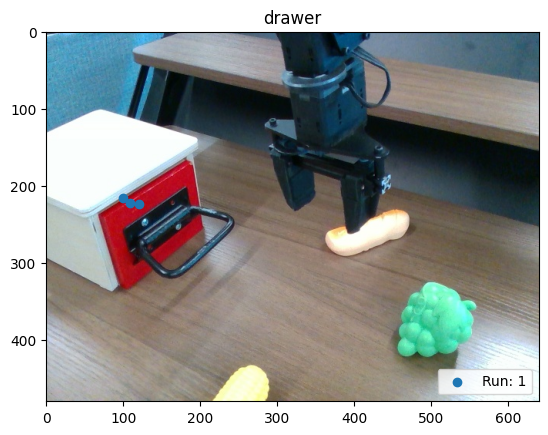

Task: 5
Move the can from the top left of the burner to the bottom left of the burner
Run: 1 - Output: [(0.280, 0.244), (0.295, 0.246), (0.264, 0.246)]


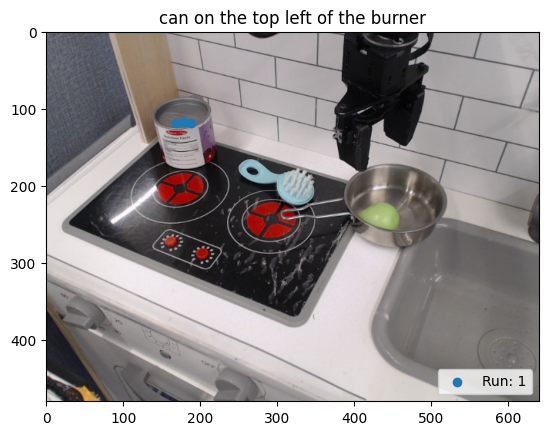

Run: 1 - Output: [(0.225, 0.560), (0.242, 0.562), (0.258, 0.558)]


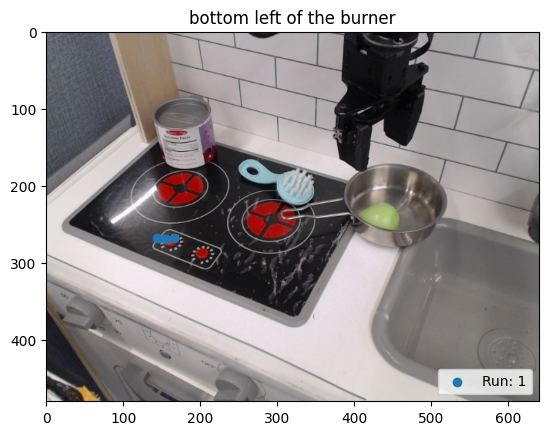

Task: 6
Move the can from the top left of the burner to the bottom left of the burner
Run: 1 - Output: [(0.281, 0.219), (0.266, 0.221), (0.298, 0.219)]


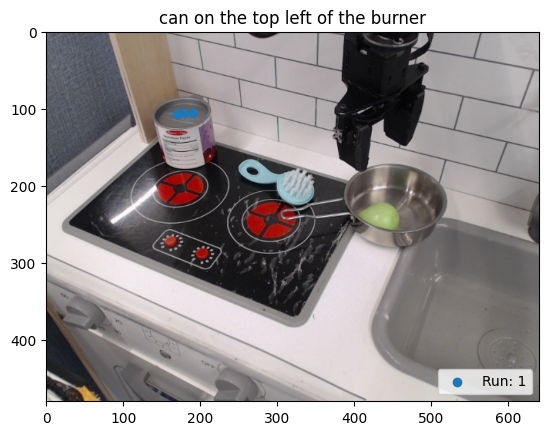

Run: 1 - Output: [(0.259, 0.594), (0.284, 0.594), (0.242, 0.592), (0.270, 0.577)]


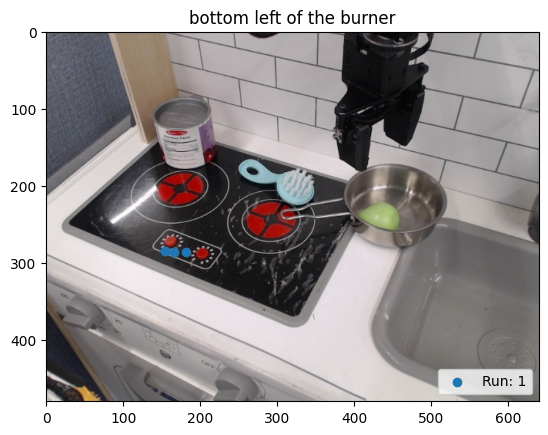

Task: 7
move the pot from the left to the right stove

Run: 1 - Output: [(0.280, 0.840), (0.256, 0.840), (0.300, 0.840)]


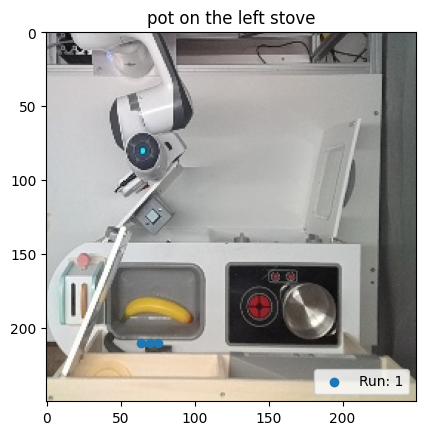

Run: 1 - Output: [(0.628, 0.792), (0.609, 0.796), (0.644, 0.794)]


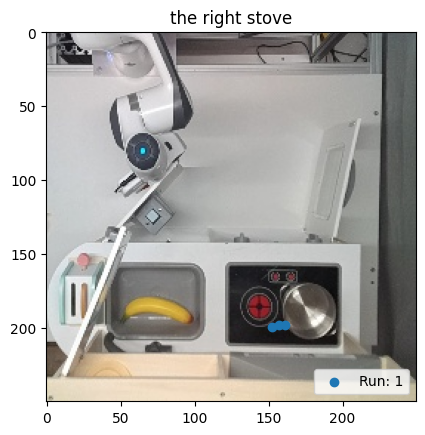

Task: 8
put potato in pot or pan

Run: 1 - Output: [(0.278, 0.473), (0.256, 0.492), (0.298, 0.471), (0.255, 0.469), (0.272, 0.494), (0.239, 0.473)]


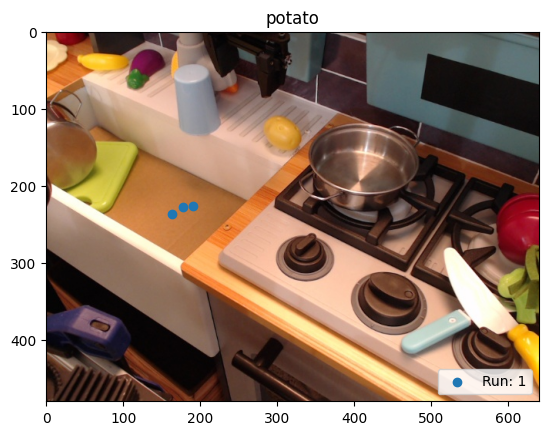

Run: 1 - Output: [(0.633, 0.448), (0.652, 0.446), (0.613, 0.446), (0.673, 0.448)]


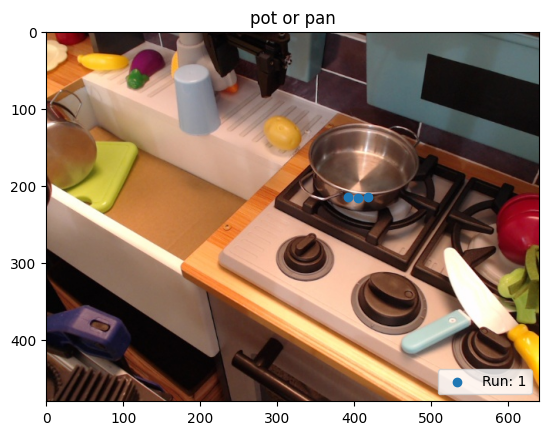

Task: 9
take cucumber out of cup

Run: 1 - Output: [(0.408, 0.727), (0.428, 0.706), (0.423, 0.733), (0.439, 0.723), (0.408, 0.704)]


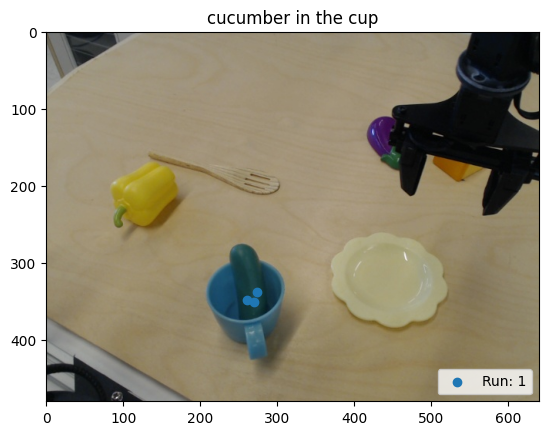

Task: 10
move the banana from the right stove to the sink

Run: 1 - Output: [(0.531, 0.827), (0.547, 0.829), (0.567, 0.829)]


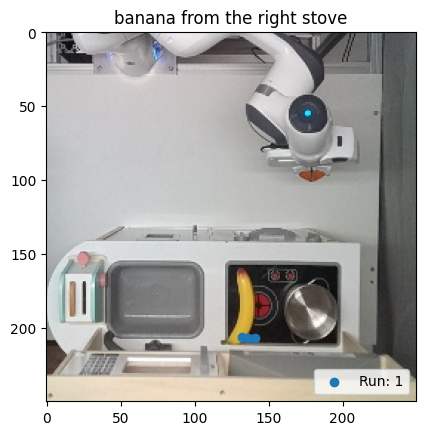

Run: 1 - Output: [(0.573, 0.879), (0.589, 0.877), (0.558, 0.877)]


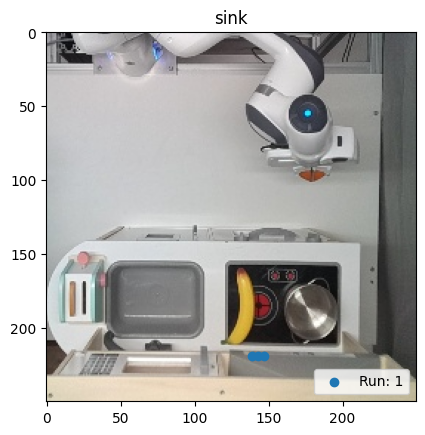

Task: 11
pick up the toast and put it to the sink

Run: 1 - Output: [(0.289, 0.702), (0.258, 0.700), (0.273, 0.694)]


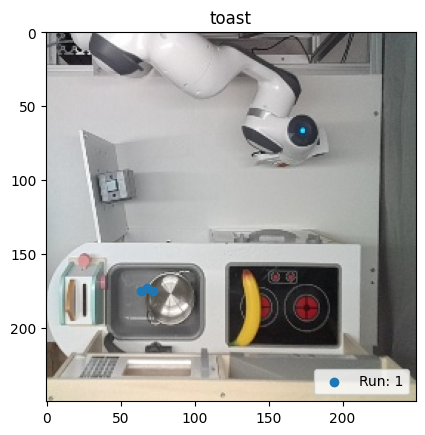

Run: 1 - Output: [(0.286, 0.721), (0.255, 0.717), (0.270, 0.719)]


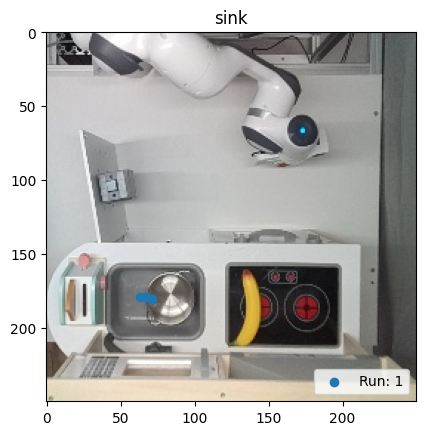

Task: 12
close the microwave

Run: 1 - Output: [(0.694, 0.390), (0.675, 0.392), (0.659, 0.390), (0.709, 0.392)]


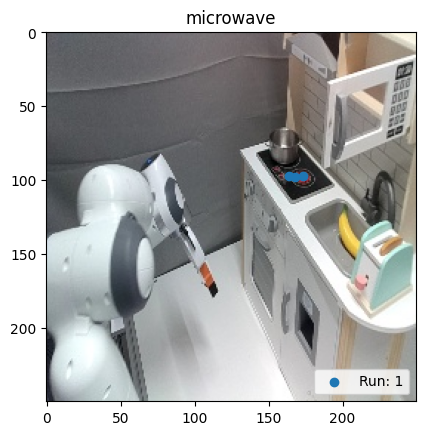

Task: 13
push the toaster lever

Run: 1 - Output: [(0.361, 0.860), (0.339, 0.850), (0.317, 0.848), (0.381, 0.856), (0.302, 0.846)]


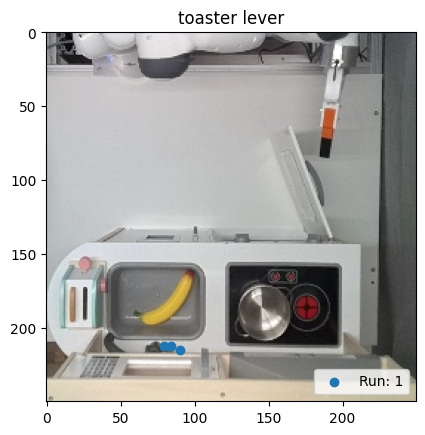

Task: 14
pick up glass cup
Run: 1 - Output: [(0.317, 0.385), (0.333, 0.383), (0.300, 0.383)]


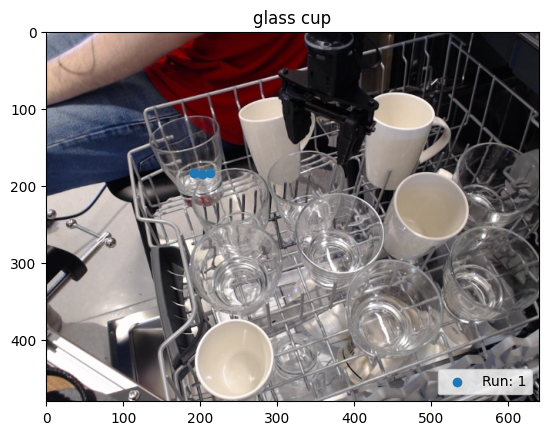

Task: 15
take the broccoli and put it between the two right burners
Run: 1 - Output: [(0.319, 0.408), (0.303, 0.415), (0.336, 0.406), (0.352, 0.408)]


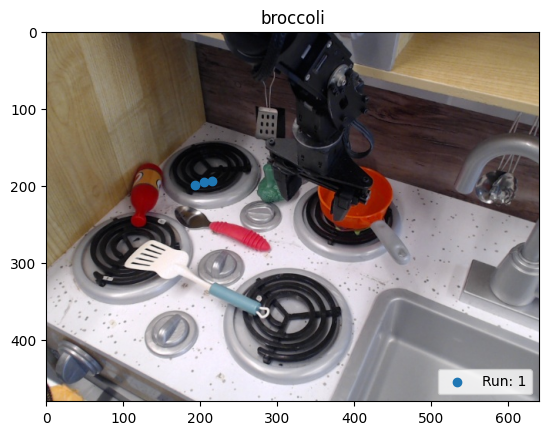

Run: 1 - Output: [(0.498, 0.550), (0.475, 0.556), (0.459, 0.548), (0.484, 0.537)]


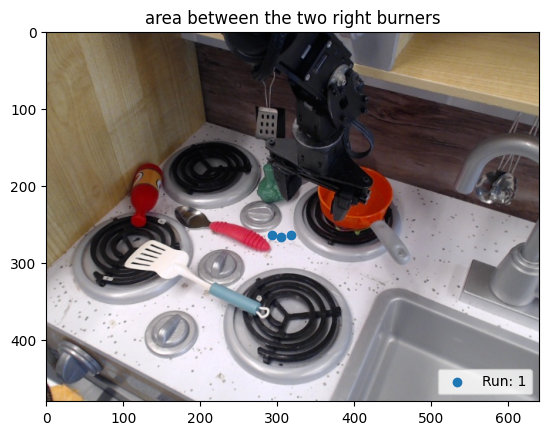

Task: 16
move the pot from the left to the right stove

Run: 1 - Output: [(0.675, 0.369), (0.658, 0.369)]


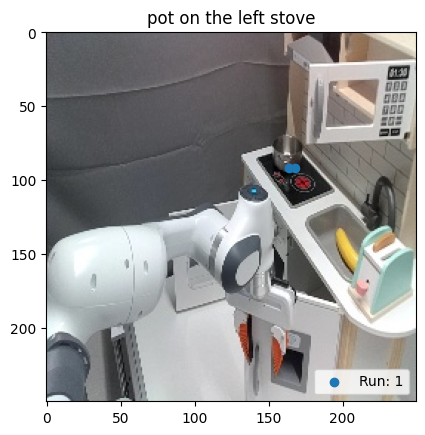

Run: 1 - Output: [(0.694, 0.444), (0.678, 0.440), (0.713, 0.440)]


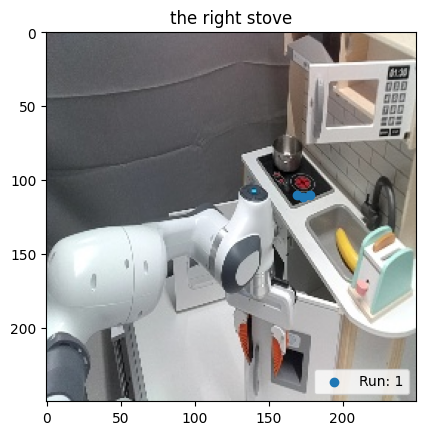

In [8]:
from PIL import Image

tasks, images, ground_truths, object_list = extract_all("../data/base_experiments")

NUMBER_OF_RUNS = 1

for i in range(len(tasks)):   
    print(f"Task: {i + 1}")
    print(tasks[i])

    image_path = images[i]
    task = tasks[i]
    objects = object_list[i]

    with Image.open(image_path) as image:
        width, height = image.size
        for object in objects:
            labels = []
            coordinate_list = []
            prompt = generate_prompt(object, "Locate several points within the space of the ")
            for j in range(NUMBER_OF_RUNS):
                labels.append(f"Run: {j + 1}")
                output = do_inference(image, prompt, model, processor, tokenizer, 0.2)
                coordinates = get_coordinates(output, width, height)[:3]
                coordinate_list.append(coordinates)
            
                print(f"Run: {j + 1} - Output: {output}")
            visualize_points_on_image(image, labels, coordinate_list, object)